# A_Task

### 1)Описание:

Есть 100 значений некоторой абстрактной переменной, по которым была обучена модель. Затем была посчитана среднеквадратическая ошибка (MSE). Для 80 случаев разница истинного и предсказанного значения составляет 0,5, а для остальных 20 случаев равняется -0,3. Вы знаете, что модель была обучена неверно. Если добавить к ответам модели некоторую константу C, то результат улучшится. Существует ли такая константа? Если да, найдите её.

### Решение:

Ответ: Да, существует и ее примерное значение будет равно: -0.332 

В качестве доказательства ответа я написал код, который подбирает константу для заданных значений.
В этом коде я считаю mse_score для различных значений переменной C:

mse_score without variable: 0.21639999999999998 

mse_score with varuable: 
 variable: -0.3319999999999994 
 score: 0.10617600000000003 



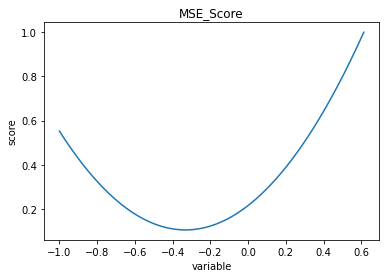

In [9]:
import matplotlib.pyplot as plt

class Iterator:
    def __init__(self, step):
        self.start = -1
        self.end = 1
        self.num = self.start
        self.step = step
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.num < self.end:
            num = self.num
            self.num += self.step
            return num

def mse_variable_score(variable):
    new_preds = [(variable + elem)**2 for elem in preds]
    return sum(new_preds) / len(new_preds)



condition = lambda index: 0.5 if index < 79 else -0.3
preds = list(map(condition, range(100)))

answers = []
variables = []
for i in Iterator(0.001):
    if i != None:
        score = mse_variable_score(i)
        if score <= 1:
            answers.append(mse_variable_score(i))
            variables.append(i)
    else:
        break

max_elem = 0
max_score = float("inf")

for index, score in enumerate(answers):
    if score < max_score:
        max_elem = variables[index]
        max_score = score
        
print("mse_score without variable:", mse_variable_score(0),"\n")
print("mse_score with varuable:", "\n", "variable:", max_elem,
      "\n", "score:", max_score, "\n")
plt.xlabel('variable')
plt.ylabel('score')
plt.title("MSE_Score")
plt.plot(variables, answers)
plt.show()

### 2)Описание:

Существует некий временной ряд, область допустимых значений которого [0; +∞). Допустим, это количество шагов. Предположим, вы используете два алгоритма машинного обучения для построения модели, предсказывающей количество шагов в определённый день, — градиентный бустинг и случайный лес. Какой из данных алгоритмов может возвращать отрицательные значения в качестве прогнозируемых и почему?

### Решение:

Ответ: Градиентный бустинг. Дальше я постараюсь объяснить почему:

1)Для начала дам краткий ответ почему это не может быть Random Forest: Поскольку особенностью этой модели является усреднение прогнозов всех деревьев, следовательно проблемой нашей модели является скорее то, что мы можем не отследить тенденцию в данных, подробнее это описано в этой статье: https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why. Так как мы усредняем значения всех выходов, мы явно не можем получить что-то на подобии отрицательных значений на датасете, состоящем из положительных чисел.

2)Так как Gradient Boosting последовательно подгоняет деревья регрессии к остаткам предыдущего этапа обучения, можно заметить следующее: Если дерево на текущем этапе предсказывает значение, превышающее истинное значение конкретного обучающего примера, остаток на этом этапе для этого примера будет отрицательным, и поэтому дерево регрессии на следующем этапе  столкнется с отрицательными целевыми значениями. Поскольку модель складывает все эти деревья, чтобы сделать окончательный прогноз может возникнуть ситуациия, когда сумма отрицательных остатков превысит положительные выходы и мы получим отрицательный прогноз модели. Подобное часто происходит при увеличении количества решающих деревьев. В качестве используемого материала прикреплю ссылку статью с описанием модели из википедии: https://clck.ru/VECNq

### 3)Описание:

Предположим, мы обучили линейную модель. Анализируя остатки модели, мы обнаружили значительную гетероскедастичность. Ваш коллега предложил использовать стандартные ошибки в форме Уайта, чтобы добиться лучшего качества модели. Снова обучили модель, однако R-квадрат остался тем же. Предложите объяснение этого явления. Приведите необходимые выкладки.

### Решение:

### 4)Описание:

С помощью некоторого датчика мы наблюдаем за температурой в холодильном отделении. Система должна поддерживать околонулевое значение. При поступлении нового измерения с датчика мы должны отдавать в stdout значение стандартного отклонения, рассчитанного по всей истории наблюдений.

```
stream = Stream(port=port, host=host)
while  stream.has_next():
    value = stream.next_value()
    # std calculation TBD
    print(std_value)
```
    
stream – это поток измерений с датчика, у него есть два метода:

• has_next() — проверяет, есть ли следующее значение, возвращает bool,

• next_value() — возвращает поступившее измерение, float.

Напишите код, вычисляющий стандартное отклонение при условии, что он должен работать на машине с оперативной памятью, не превышающей 100 МБ (из которых больше половины уже занято Python’ом :))

### Решение:

Довольно тривиальная реализация, поскольку у нас во время вычислений нет необходимости хранить все значения, мы можем для каждого элемента считать как длину выборки так и среднее значение по выборке, на основании предыдущих значений. Для удобства тестирования я создал класс Stream по предложенному вами тз.

In [38]:
from numpy.random import rand

class Stream:
    def __init__(self, port, host):
        self.port = port
        self.host = host
        self.numbers = rand((10))
        self.current_index = 0
        
    def has_next(self):
        if self.current_index < len(self.numbers):
            return True
        else:
            return False
    
    def next_value(self):
        cur_value = self.numbers[self.current_index]
        self.current_index += 1
        return cur_value

In [44]:
stream = Stream(port = "Vozmite na stazhku", host = "plez")

sum_of_values = 0
current_median_value = 0
number_of_values = 0

while  stream.has_next():
    
    value = stream.next_value()
    sum_of_values += value
    number_of_values += 1
    current_median_value = sum_of_values / number_of_values
    std_value = sqrt((value - current_median_value)**2
                     / number_of_values)
    
    print(std_value)

0.0
0.04521496116868177
0.253751585083922
0.14410228413408355
0.05344737609175367
0.0392246488500048
0.13545103973846465
0.10836872552183358
0.13593280047884157
0.09523180501127582


# B_Task

### Описание:

Создан класс Task, который может выполнять некие расчёты (задачи). Статистику по выполненным расчётам собирает класс Counter. Задачи выполняются в файле main.py в несколько потоков. Но в этом коде есть баг, поэтому расчёты выполняются неверно. Сделайте ревью кода и найдите все баги, чтобы расчеты были корректными, а код понятным и стилистически правильным.

```
# main.py
from concurrent.futures import ThreadPoolExecutor
from counter import Counter
from task import Task
new_counter = Counter()
values = [2]*10
tasks = []
for value in values:
    tasks.append(Task(value))
with ThreadPoolExecutor(max_workers=2) as executor:
    for task in tasks:
        executor.submit(new_counter.update, task.execute())
print(new_counter.value)
# task.py
import time
class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
    def execute(self):
        new_value = self.value**2
        self.value = new_value
        return self.value
# counter.py
import time
class Counter:
    def __init__(self):
        self.value = 0
    def update(self, new_value):
        local = self.value
        local += new_value
        time.sleep(0.1)
        self.value = local
```

### Решение:


Насколько я понимаю, у этой задачи нет какого-то конкретного и явно верного решения. Скорее это задача на то, чтоб оформить правильно код и сделать его более читабильным. Поэтому я слегка исправил классы, убрал странные и лишние действия и также придумал какую хотя бы более менее логически верную задачу этот код мог бы исполнять. Что было изменено:

1)Разбил все 3 файла на 3 отдельные ячейки, для более удобной работы с кодом в дальнейшем. Также это логически верно со стороны архитектуры, так как мы эмилируем некую разработку абстрактной программы, где сущности наших задач разбиты на классы.

2)Добавил разбиения между методами классов.

3)Я не очень понял почему в коде значения поля value у класса Task во время вызова метода update выносилось в некоторую переменную локал, а потом только к ней добавлялось значение new_value, а после все это перезаписывалось обратно в поле класса. Имхо было бы проше сразу к полю этого класса добавлять это значение, без лишних танцев с бубном и переменной local

4)В классе execute тоже довольно кринжовая реализация, ибо метод execute одновременно и возводит поле в квадрат и возвращает его на вывод, в моем понимании это должно работать следующим образом: метод execute возводит поле в квадрат, а новый метод get_value возвращает значение переменной value. Все же все мы здесь немножечко программисты и хотим чтобы методы класса делали одно определенное действие.


5)В файле мейн довольно странно отдельно создавать массив tasks и заполнять его с помощью отдельно цикла, по - моему мнению в такой тривиальной ситуации можно воспользоваться генератором списка и не разбивать код на 3 отдельные строки вместо одной.

6)Также довольно странно что мы явно получаем доступ к полю класса Counter, по - моему мнению лучше завести для этого отдельный геттер.


In [25]:
# task.py
import time

## расчеты
class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
        
        
    def execute(self):
        self.value **= 2
        
    def get_value(self):
        return self.value

In [26]:
# counter.py
import time

# статистика
class Counter:
    
    def __init__(self):
        self.value = 0
        
    def update(self, new_value):
        time.sleep(0.1)
        self.value += new_value
        
    def get_value(self):
        return self.value

In [27]:
# main.py
from concurrent.futures import ThreadPoolExecutor
# from counter import Counter
# from task import Task


new_counter = Counter()
values = [2] * 10
tasks = [Task(value) for value in values]

    
with ThreadPoolExecutor(max_workers = 2) as executor:
    for task in tasks:
        executor.submit(task.execute())
        executor.submit(new_counter.update(task.get_value()))
        print(new_counter.get_value())

4
8
12
16
20
24
28
32
36
40
